## 정규방정식

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
x, y = data[['age']], data[['charges']]

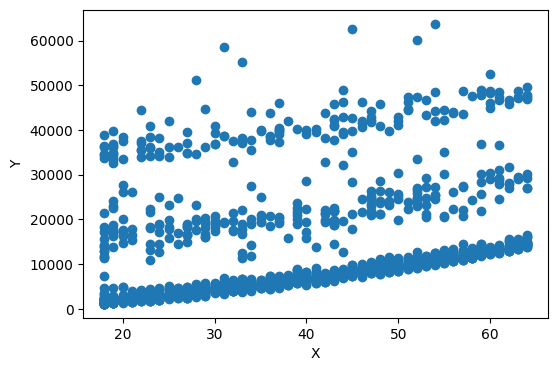

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

In [8]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

#### 회귀식 : Y = b0 + b1X

In [11]:
ic, co = lr.intercept_, lr.coef_
print(f'절편(b1) : {ic[0]}, 계수(b0) : {co[0][0]}')
print(f'회귀식 : Y^ (Y_hat) = {co[0][0]} + {ic[0]}X')

절편(b1) : 3165.8850060630284, 계수(b0) : 257.72261866689547
회귀식 : Y^ (Y_hat) = 257.72261866689547 + 3165.8850060630284X


In [19]:
print(f'결정계수 R2 (R-squared) : {lr.score(x, y):0.3%}')

결정계수 R2 (R-squared) : 8.941%


In [24]:
import warnings
warnings.filterwarnings('ignore')

x_new = [[19], [64]]
y_hat = lr.predict(x_new)

print(f'{x_new[0][0]}세의 의료비용 예측값 : {y_hat[0][0]}\n{x_new[1][0]}세의 의료비용 예측값 : {y_hat[1][0]}')

19세의 의료비용 예측값 : 8062.614760734043
64세의 의료비용 예측값 : 19660.13260074434


## 경사하강법 (Gradient Descent)

In [52]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, random_state = 45)
sgd_reg.fit(x, y)

SGDRegressor(random_state=45)

In [53]:
ic, co = sgd_reg.intercept_, sgd_reg.coef_
print(f'절편(b1) : {ic[0]}, 계수(b0) : {co[0]}')
print(f'회귀식 : Y^ (Y_hat) = {co[0]} + {ic[0]}X')

절편(b1) : 8032.651928515547, 계수(b0) : 55.01380516556449
회귀식 : Y^ (Y_hat) = 55.01380516556449 + 8032.651928515547X


In [54]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)

print(f'{x_new[0][0]}세의 의료비용 예측값 : {y_hat[0]}\n{x_new[1][0]}세의 의료비용 예측값 : {y_hat[1]}')

19세의 의료비용 예측값 : 9077.914226661273
64세의 의료비용 예측값 : 11553.535459111674


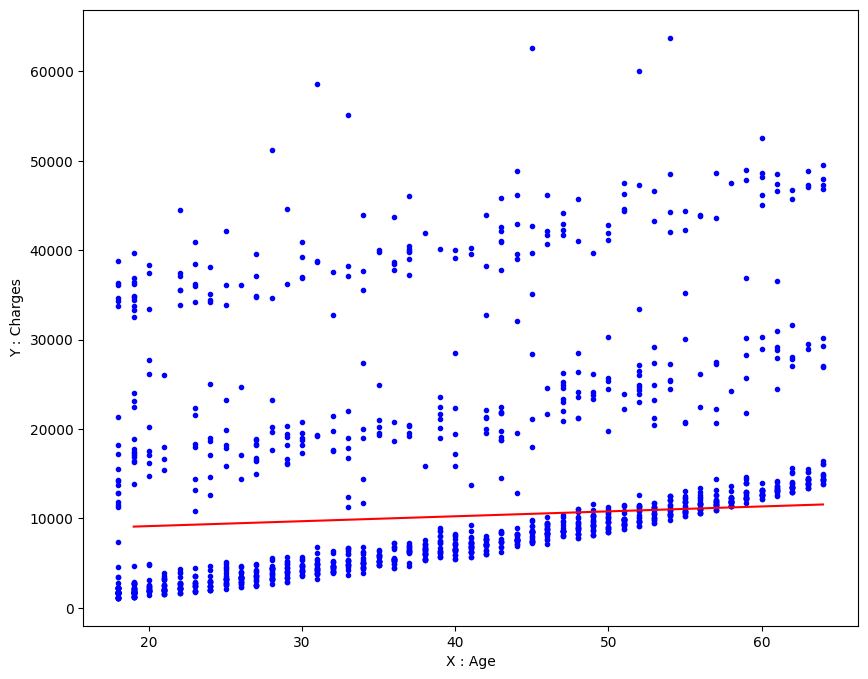

In [55]:
plt.figure(figsize=(10,8))
plt.plot(x, y, 'b.')
plt.plot(x_new, y_hat, 'r-')
plt.xlabel('X : Age')
plt.ylabel('Y : Charges')
plt.show();

## 다항 회귀 (Polynomial)

In [57]:
cereal = pd.read_csv('./data/cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [58]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [61]:
cereal_df = cereal[cereal.sugars >= 0].iloc[:,3:]
cereal_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [62]:
x, y = cereal_df[['sugars']], cereal_df[['rating']]

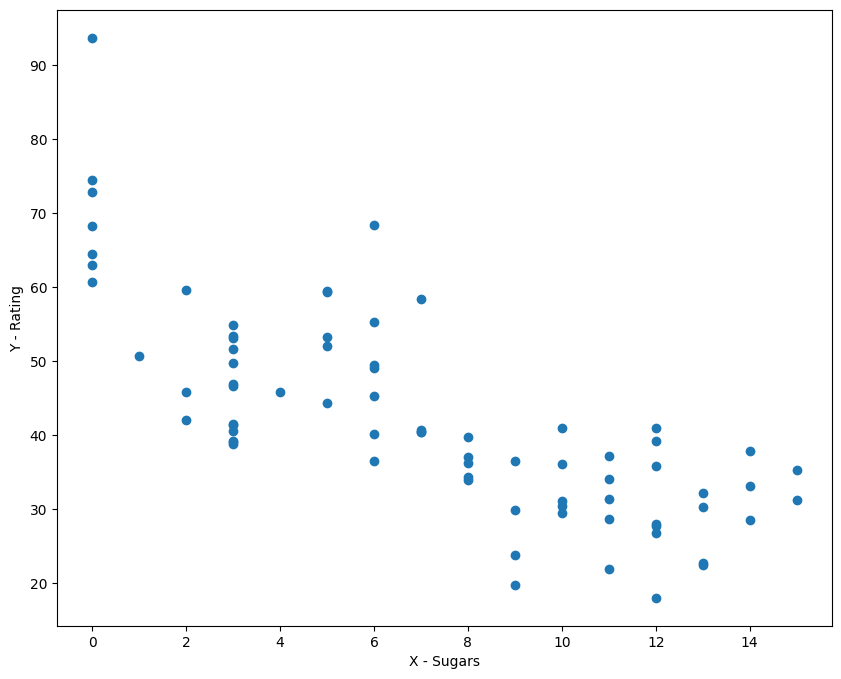

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.xlabel('X - Sugars')
plt.ylabel('Y - Rating')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((53, 1), (23, 1), (53, 1), (23, 1))

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)

In [68]:
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [69]:
x_test_poly = poly_reg.transform(x_test)
y_pred = reg.predict(x_test_poly)
y_pred

array([[63.48250751],
       [45.91349988],
       [52.18770726],
       [30.11059509],
       [63.48250751],
       [30.86194585],
       [52.18770726],
       [30.11059509],
       [48.92503763],
       [36.37866776],
       [38.38567795],
       [30.86194585],
       [31.86442849],
       [43.15309401],
       [40.64382004],
       [52.18770726],
       [33.11804303],
       [34.62278945],
       [31.86442849],
       [33.11804303],
       [52.18770726],
       [55.70150879],
       [33.11804303]])

In [71]:
y_test['pred'] = y_pred
y_test

,rating,pred
3,93.704912,63.482508
2,59.425505,45.913500
69,38.839746,52.187707
70,28.592785,30.110595
54,60.756112,63.482508
14,22.736446,30.861946
43,54.850917,52.187707
52,37.840594,30.110595
34,45.811716,48.925038
12,19.823573,36.378668


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test.rating, y_pred)
mae = mean_absolute_error(y_test.rating, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(x_test_poly, y_test.rating)

print(f'MSE : {mse:.3f}\nMAE : {mae:.3f}\nRMSE : {rmse:.3f}\n R2-Score : {r2_score:.3%}')

MSE : 94.887
MAE : 7.123
RMSE : 9.741
 R2-Score : 62.020%


In [78]:
y_test

,rating,pred
3,93.704912,63.482508
2,59.425505,45.913500
69,38.839746,52.187707
70,28.592785,30.110595
54,60.756112,63.482508
14,22.736446,30.861946
43,54.850917,52.187707
52,37.840594,30.110595
34,45.811716,48.925038
12,19.823573,36.378668
